In [28]:
import numpy as np
import pandas as pd
import yaml
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns

# Import

First we open a file containing a dictionary of columns and associated data types generated in `../../optimize/`, then we read input file.

In [29]:
with open('../input/dtypes.yaml', 'r') as yamlfile:
    column_types = yaml.load(yamlfile)

In [30]:
read_csv_opts = {'sep': '|',
                 'quotechar': '"',
                 'compression': 'gzip',
                 'encoding': 'utf-8',
                 'dtype': column_types,
                 'parse_dates': ['MissionDate'],
                 'infer_datetime_format': True}

In [31]:
df = pd.read_csv('../input/ice-air.csv.gz', **read_csv_opts)

/Users/philneff/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [32]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1763020 entries, 0 to 1763019
Data columns (total 43 columns):
Status                  category
Sex                     category
Convictions             category
GangMember              category
ClassLvl                float32
Age                     float32
MissionDate             datetime64[ns]
MissionNumber           uint32
PULOC                   category
DropLoc                 category
StrikeFromList          float32
ReasonStruck            category
R-T                     category
Code                    category
CountryOfCitizenship    category
Juvenile                object
MissionWeek             uint8
MissionQuarter          uint8
MissionYear             uint16
MissionMonth            uint8
Criminality             category
FamilyUnitFlag          float32
UnaccompaniedFlag       float32
AlienMasterID           uint32
MissionID               uint16
air_AirportID           float32
air_AirportName         category
air_City       

# Analyze

In [33]:
df.head()

,Status,Sex,Convictions,GangMember,ClassLvl,Age,MissionDate,MissionNumber,PULOC,DropLoc,...,air_Country,air2_AirportID,air2_AirportName,air2_City,st2_StateID,st2_StateAbbr,aor2_AORID,aor2_AOR,aor2_AORName,air2_Country
0,Removal,M,Non-Criminal,No,1.0,18.0,2010-10-01,110003,KIWA,MGGT,...,USA,149.0,La Aurora Airport,Guatemala City,NaN,NaN,NaN,NaN,NaN,Guatemala
1,Removal,M,Non-Criminal,No,1.0,38.0,2010-10-01,110003,KIWA,MGGT,...,USA,149.0,La Aurora Airport,Guatemala City,NaN,NaN,NaN,NaN,NaN,Guatemala
2,Removal,M,Non-Criminal,No,1.0,20.0,2010-10-01,110003,KIWA,MGGT,...,USA,149.0,La Aurora Airport,Guatemala City,NaN,NaN,NaN,NaN,NaN,Guatemala
3,Removal,M,Non-Criminal,No,1.0,29.0,2010-10-01,110003,KIWA,MGGT,...,USA,149.0,La Aurora Airport,Guatemala City,NaN,NaN,NaN,NaN,NaN,Guatemala
4,Removal,M,Non-Criminal,No,1.0,21.0,2010-10-01,110003,KIWA,MGGT,...,USA,149.0,La Aurora Airport,Guatemala City,NaN,NaN,NaN,NaN,NaN,Guatemala


No duplicate records.

In [34]:
pre = len(df)
df.drop_duplicates(inplace=True)
post = len(df)
assert (pre - post) == 0

# By nationality

In [50]:
df.columns

Index(['Status', 'Sex', 'Convictions', 'GangMember', 'ClassLvl', 'Age',
       'MissionDate', 'MissionNumber', 'PULOC', 'DropLoc', 'StrikeFromList',
       'ReasonStruck', 'R-T', 'Code', 'CountryOfCitizenship', 'Juvenile',
       'MissionWeek', 'MissionQuarter', 'MissionYear', 'MissionMonth',
       'Criminality', 'FamilyUnitFlag', 'UnaccompaniedFlag', 'AlienMasterID',
       'MissionID', 'air_AirportID', 'air_AirportName', 'air_City',
       'st_StateID', 'st_StateAbbr', 'AOR_AORID', 'AOR_AOR', 'AOR_AORName',
       'air_Country', 'air2_AirportID', 'air2_AirportName', 'air2_City',
       'st2_StateID', 'st2_StateAbbr', 'aor2_AORID', 'aor2_AOR',
       'aor2_AORName', 'air2_Country', 'NonCriminal'],
      dtype='object')

In [51]:
nationality = 'SOMALIA'

In [52]:
nationality_df = df[df['CountryOfCitizenship'] == nationality]

In [53]:
nationality_df.reset_index(inplace=True)

In [54]:
groupby = nationality_df.groupby(['CountryOfCitizenship','MissionDate', 'R-T', 'PULOC', 'DropLoc'])

In [55]:
table = groupby['AlienMasterID'].nunique().reset_index(name='AlienMasterIDCount')
table['MissionIDCount'] = groupby['MissionID'].nunique().reset_index(name='MissionIDCount')['MissionIDCount']

In [56]:
repatriations = table[table['R-T'] == 'R'].copy()
transfers = table[table['R-T'] == 'T'].copy()

In [57]:
transfers.head()

,CountryOfCitizenship,MissionDate,R-T,PULOC,DropLoc,AlienMasterIDCount,MissionIDCount
0,SOMALIA,2010-10-01,T,KSAN,KIWA,3,1
1,SOMALIA,2010-10-02,T,KIWA,KBFI,3,1
2,SOMALIA,2010-10-15,T,KONT,KIWA,9,1
3,SOMALIA,2010-10-16,T,KIWA,KBFI,9,1
4,SOMALIA,2010-11-09,T,KSAN,KIWA,1,1


In [58]:
transfers.to_csv(f'../output/{nationality.lower()}_transfers.csv.gz', compression='gzip', sep='|', index=False)
repatriations.to_csv(f'../output/{nationality.lower()}_repatriations.csv.gz', compression='gzip', sep='|', index=False)

In [59]:
repatriations.set_index('MissionDate', inplace=True)

In [60]:
r_cum = repatriations['AlienMasterIDCount'].cumsum()
t_cum = transfers['AlienMasterIDCount'].cumsum()

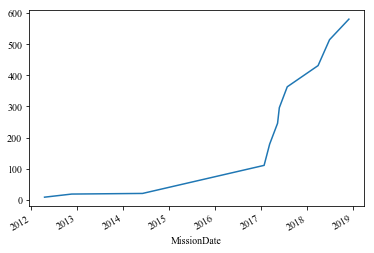

In [61]:
r_cum.plot();

In [62]:
nationality_df.set_index('MissionDate', drop=False, inplace=True)

In [63]:
g = nationality_df.groupby(['MissionYear', 'R-T', 'air2_Country', 'air2_AirportName'])[['AlienMasterID', 'MissionID']].nunique()
g.reset_index(inplace=True)
repatriation_dropoff_airports = g[g['R-T'] == 'R'].copy()
transfer_dropoff_airports = g[g['R-T'] == 'T'].copy()

In [64]:
repatriation_dropoff_airports.sort_values(by=['MissionYear', 'AlienMasterID'], ascending=[True, False], inplace=True)
transfer_dropoff_airports.sort_values(by=['MissionYear', 'AlienMasterID'], ascending=[True, False], inplace=True)

In [65]:
repatriation_dropoff_airports.head(10)

,MissionYear,R-T,air2_Country,air2_AirportName,AlienMasterID,MissionID
11,2012,R,Kenya,Jomo Kenyatta International Airport,19,2
33,2014,R,Kenya,Jomo Kenyatta International Airport,2,1
82,2017,R,Somalia,Aden Adde International Airport,342,5
103,2018,R,Somalia,Aden Adde International Airport,217,3


In [66]:
repatriation_dropoff_airports.to_csv(f'../output/{nationality}_repatriation_dropoff_airports.csv')
transfer_dropoff_airports.to_csv(f'../output/{nationality}_transfer_dropoff_airports.csv')

In [67]:
pivot = pd.pivot_table(data=repatriation_dropoff_airports,
                       index='MissionYear',
                       columns='air2_Country',
                       values='MissionID',
                       aggfunc=np.sum,
                       fill_value=0)

In [68]:
pivot = pivot.reindex(pivot.sum().sort_values(ascending=False).index, axis=1)

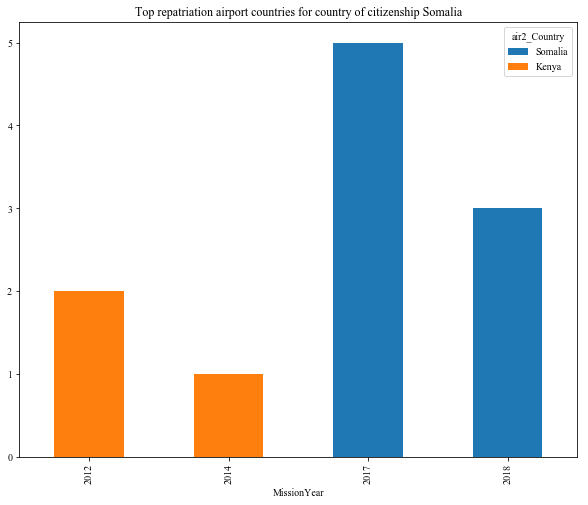

In [69]:
title = f"Top repatriation airport countries for country of citizenship {nationality.title()}"
fig = pivot.plot(kind='bar', stacked=True, figsize=(10, 8), title=title)


## Juveniles only

In [70]:
df['Juvenile'].value_counts()

False    1735639
True       26197
Name: Juvenile, dtype: int64

In [71]:
juv_table = groupby['Juvenile'].sum().reset_index(name='Juveniles')

In [72]:
juv_repatriations = juv_table[juv_table['R-T'] == 'R'].copy()
juv_transfers = juv_table[juv_table['R-T'] == 'T'].copy()

In [73]:
juv_repatriations.set_index('MissionDate', inplace=True)

In [74]:
juv_r_cum = juv_repatriations['Juveniles'].cumsum()

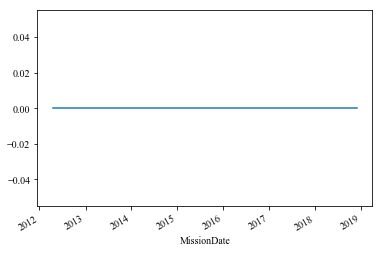

In [75]:
juv_r_cum.plot()

In [76]:
repatriations['Juveniles'] = juv_repatriations['Juveniles']

In [79]:
repatriations['JuvPercent'] = juv_repatriations['Juveniles'] / repatriations['AlienMasterIDCount']

In [80]:
repatriations.tail(20)

,CountryOfCitizenship,R-T,PULOC,DropLoc,AlienMasterIDCount,MissionIDCount,Juveniles,JuvPercent
MissionDate,,,,,,,,
2012-04-15,SOMALIA,R,KAEX,HKJK,9,1,0,0
2012-11-17,SOMALIA,R,KAEX,HKJK,10,1,0,0
2014-06-03,SOMALIA,R,KMIA,HKJK,2,1,0,0
2017-01-24,SOMALIA,R,KAEX,HCMM,90,1,0,0
2017-03-09,SOMALIA,R,KAEX,HCMM,68,1,0,0
2017-05-11,SOMALIA,R,KAEX,HCMM,67,1,0,0
2017-05-25,SOMALIA,R,KIWA,HCMM,50,1,0,0
2017-07-27,SOMALIA,R,KAEX,HCMM,67,1,0,0
2018-03-29,SOMALIA,R,KELP,HCMM,68,1,0,0


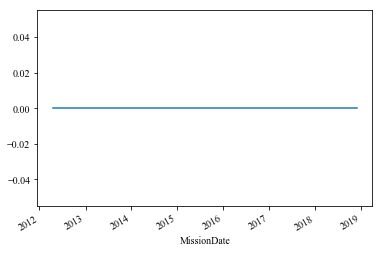

In [81]:
repatriations['JuvPercent'].plot();

# Rate of flights

## Global

In [82]:
df.reset_index(inplace=True)
df.set_index('MissionDate', inplace=True)

In [83]:
daily_flights = df['MissionID'].resample('D').nunique()
monthly_flights = df['MissionID'].resample('M').nunique()
quarterly_flights = df['MissionID'].resample('Q').nunique()
annual_flights = df.loc['2011':'2018']['MissionID'].resample('AS').nunique()

In [84]:
annual_flights

MissionDate
2011-01-01    2117
2012-01-01    2368
2013-01-01    2041
2014-01-01    2094
2015-01-01    1306
2016-01-01    1540
2017-01-01    1514
2018-01-01    1545
Freq: AS-JAN, Name: MissionID, dtype: int64

In [85]:
monthly_means = pd.DataFrame(columns=['year', 'monthly_mean_flights'])
for year in range(2011, 2019):
    mean = monthly_flights[f'{year}'].mean()
    monthly_means = monthly_means.append({'year':year, 'monthly_mean_flights':mean}, ignore_index=True)

In [86]:
monthly_means

,year,monthly_mean_flights
0,2011.0,176.416667
1,2012.0,197.333333
2,2013.0,170.083333
3,2014.0,174.500000
4,2015.0,108.833333
5,2016.0,128.333333
6,2017.0,126.166667
7,2018.0,128.750000
